In [39]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical and array operations
import numpy as np

# Import matplotlib.pyplot for plotting graphs and visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization
import seaborn as sns

# Import train_test_split from sklearn.model_selection for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Import LinearRegression from sklearn.linear_model for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import OneHotEncoder from sklearn.preprocessing for converting categorical variables into a form that could be provided to ML algorithms
from sklearn.preprocessing import OneHotEncoder

# Import r2_score from sklearn.metrics for evaluating the performance of the linear regression model
from sklearn.metrics import r2_score

In [45]:
# Load the dataset from 'day.csv' into a pandas DataFrame for further analysis and processing
df = pd.read_csv('day.csv')

In [41]:
# Display the first 5 rows of the DataFrame to understand its structure and the type of data it contains
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [46]:
# Convert the numerical 'season' codes to descriptive strings for clarity and easier analysis.
# Mapping: 1 -> 'spring', 2 -> 'summer', 3 -> 'fall', 4 -> 'winter'
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# Similarly, convert 'weathersit' numerical codes to descriptive strings for better interpretation.
# Mapping: 1 -> 'clear', 2 -> 'mist', 3 -> 'light_snow_rain', 4 -> 'heavy_rain_snow_fog'
df['weathersit'] = df['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_snow_rain', 4: 'heavy_rain_snow_fog'})

In [32]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [47]:
# Convert categorical variables 'season', 'weathersit', 'mnth', and 'weekday' into dummy variables.
# Use 'drop_first=True' to avoid the dummy variable trap by dropping the first level of each categorical variable.
# This transformation is necessary for preparing the data for linear regression analysis, 
# as it allows the model to interpret the categorical variables correctly.
df = pd.get_dummies(df, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True)

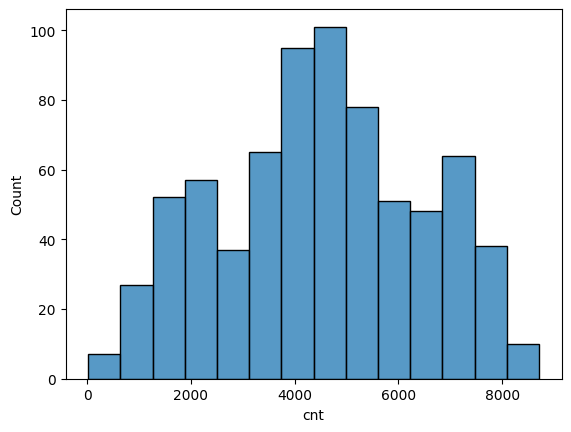

In [48]:
# Distribution of 'cnt'
sns.histplot(df['cnt'])
plt.show()

In [52]:
# Define predictors and target
X = df.drop(['casual', 'registered', 'dteday', 'instant'], axis=1)
y = df['cnt']

In [53]:
# Split the dataset into training and testing sets to evaluate the performance of our linear regression model.
# We allocate 80% of the dataset to the training set and 20% to the testing set using the 'test_size=0.2' parameter.
# The 'random_state=100' parameter ensures that the split is reproducible, so we get the same training and testing sets each time we run this code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [54]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared score on the test set: {r2:.2f}")

R-squared score on the test set: 1.00
